In [422]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [423]:
data = pd.read_csv('/kaggle/input/wine-quality-dataset/winequality-red.csv', sep=';')

In [424]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [425]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [426]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [427]:
print("Quality Points:",data['quality'].unique())

Quality Points: [5 6 7 4 8 3]


In [428]:
print(data['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


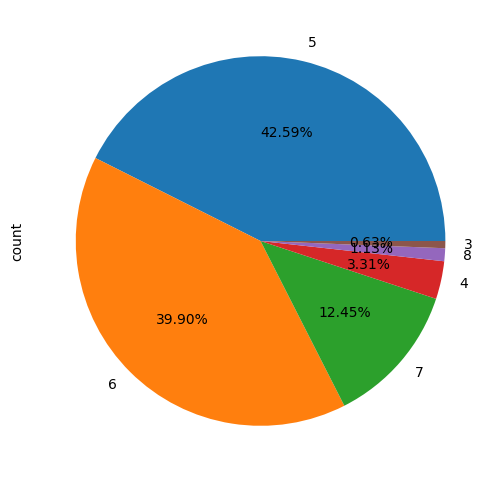

In [429]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
data['quality'].value_counts().plot.pie(autopct="%1.2f%%")
plt.show()

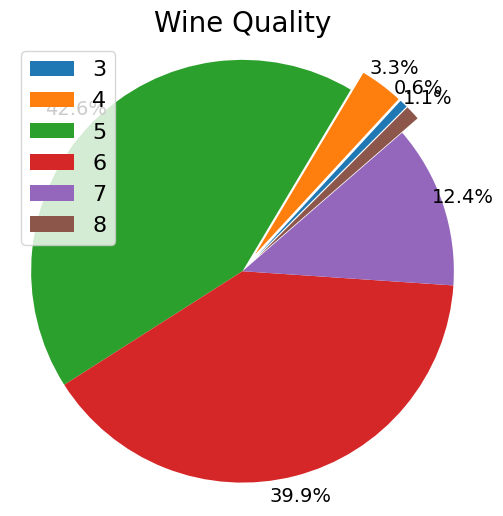

In [430]:
quality = data["quality"].value_counts().sort_index(ascending=True)
explode_list = [0.1, 0.1, 0, 0, 0, 0.1]
ax = quality.plot(kind='pie',
             figsize = (6,6),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             explode=explode_list,
             textprops={'fontsize': 14})
ax.patch.set_facecolor('white')
plt.title('Wine Quality', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=quality.index, loc="upper left", fontsize=16);

/tmp/ipykernel_33/404540653.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['alcohol'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


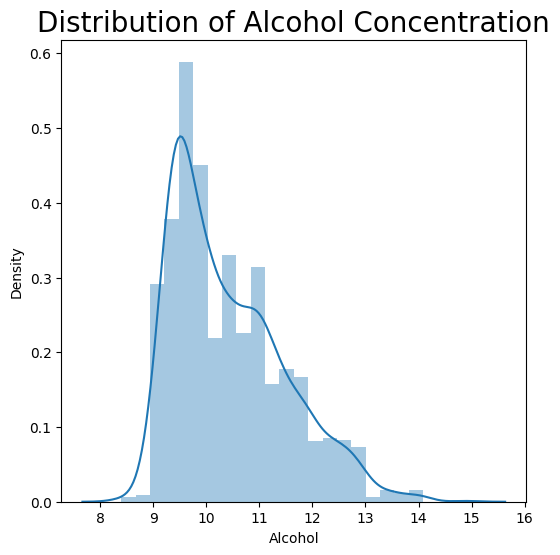

In [431]:
plt.figure(figsize=(6, 6))
ax = sns.distplot(data['alcohol'])
ax.set_title('Distribution of Alcohol Concentration', size=20)
ax.set(ylabel='Density', xlabel='Alcohol')
plt.show()

In [432]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [433]:
data['quality'].head(20)

0     5
1     5
2     5
3     6
4     5
5     5
6     5
7     7
8     7
9     5
10    5
11    5
12    5
13    5
14    5
15    5
16    7
17    5
18    4
19    6
Name: quality, dtype: int64

In [434]:
# Separate features and target
X = data.drop('quality', axis=1).values
y = data['quality']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [435]:
def initialize_parameters_deep(layer_dims):
    np.random.seed(3)
    parameters = {}
    L = len(layer_dims) # number of layers in the network
    for l in range(1, L):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l - 1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))
    return parameters

In [436]:
def linear_forward(A, W, b):
    Z = np.dot(W, A) + b
    cache = (A, W, b)
    return Z, cache

In [437]:
def compute_cost(AL, Y):
    m = Y.shape[1]
    cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    cost = np.squeeze(cost)
    return cost

In [438]:
#def compute_cost(AL, Y, parameters, lambd):
    #m = Y.shape[1]
    #cross_entropy_cost = -np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL)) / m
    #L2_regularization_cost = lambd / (2 * m) * sum(np.sum(np.square(parameters['W' + str(l)])) for l in range(1, len(parameters) // 2 + 1))
    #cost = cross_entropy_cost + L2_regularization_cost
    #return cost

In [439]:
def sigmoid(Z):
    A = 1 / (1 + np.exp(-Z))
    cache = Z
    return A, cache

In [440]:
def relu(Z):
    A = np.maximum(0, Z)
    cache = Z
    return A, cache

In [441]:
def linear_activation_forward(A_prev, W, b, activation):
    if activation == "sigmoid":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = sigmoid(Z)
    elif activation == "relu":
        Z, linear_cache = linear_forward(A_prev, W, b)
        A, activation_cache = relu(Z)

    cache = (linear_cache, activation_cache)
    return A, cache

In [442]:
def L_model_forward(X, parameters):
    caches = []
    A = X
    L = len(parameters) // 2

    for l in range(1, L):
        A_prev = A
        A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation="relu")
        caches.append(cache)

    AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation="sigmoid")
    caches.append(cache)

    return AL, caches

In [443]:
def linear_backward(dZ, cache):
    A_prev, W, b = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis=1, keepdims=True) / m
    dA_prev = np.dot(W.T, dZ)

    return dA_prev, dW, db

In [444]:
def relu_backward(dA, activation_cache):
    Z = activation_cache
    dZ = np.array(dA, copy=True)
    dZ[Z <= 0] = 0
    return dZ

In [445]:
def sigmoid_backward(dA, activation_cache):
    Z = activation_cache
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1 - s)
    return dZ

In [446]:
def linear_activation_backward(dA, cache, activation):
    linear_cache, activation_cache = cache

    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
    elif activation == "sigmoid":
        dZ = sigmoid_backward(dA, activation_cache)

    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    return dA_prev, dW, db

In [447]:
def L_model_backward(AL, Y, caches):
    grads = {}
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation="sigmoid")

    for l in reversed(range(L-1)):
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation="relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp 
        grads["db" + str(l + 1)] = db_temp

    return grads

In [448]:
def update_parameters(parameters, grads, learning_rate):
    L = len(parameters) // 2

    for l in range(L):
        parameters["W" + str(l+1)] -= learning_rate * grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] -= learning_rate * grads["db" + str(l+1)]

    return parameters

In [449]:
def L_layer_model(X, Y, layers_dims, learning_rate=0.0075, num_iterations=3000, print_cost=False):
    np.random.seed(1)
    costs = []

    parameters = initialize_parameters_deep(layers_dims)

    for i in range(num_iterations):
        AL, caches = L_model_forward(X, parameters)
        cost = compute_cost(AL, Y)
        grads = L_model_backward(AL, Y, caches)
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and i % 10000 == 0:
            print(f"Cost after iteration {i}: {cost}")
            costs.append(cost)

    return parameters, costs

In [450]:
y_array = y.to_numpy().reshape(-1, 1)

In [451]:
# One-hot encode the target variable
encoder = OneHotEncoder(sparse=False)
y_onehot = encoder.fit_transform(y_array)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [452]:
y_onehot

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.]])

In [453]:
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.3, random_state=42)

In [463]:
layers_dims = [X_train.shape[1],25,10, y_onehot.shape[1]]

In [464]:
# Train the model
parameters, costs = L_layer_model(X_train.T, y_train.T, layers_dims, learning_rate=0.01, num_iterations=50000, print_cost=True)

Cost after iteration 0: 4.158896464608668
Cost after iteration 10000: 1.675853554865302
Cost after iteration 20000: 1.529108963911279
Cost after iteration 30000: 1.4433176221205632
Cost after iteration 40000: 1.3373228394012817


In [465]:
# Predict on the test set
def predict(X, parameters):
    AL, _ = L_model_forward(X, parameters)
    predictions = np.argmax(AL, axis=0)
    return predictions

In [466]:
y_pred = predict(X_test.T, parameters)

In [467]:
y_pred

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 4, 2, 2, 3,
       3, 4, 2, 3, 4, 2, 2, 3, 2, 2, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 2,
       2, 3, 4, 3, 2, 3, 2, 2, 3, 4, 2, 2, 3, 3, 3, 2, 2, 3, 2, 2, 4, 2,
       4, 2, 4, 3, 3, 3, 3, 3, 3, 2, 4, 3, 3, 4, 2, 4, 2, 3, 3, 4, 2, 3,
       4, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 2, 2, 4, 2,
       3, 2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 4, 2, 2, 3, 3, 2,
       2, 3, 3, 2, 3, 2, 2, 3, 4, 3, 4, 2, 2, 2, 3, 3, 3, 2, 3, 4, 2, 3,
       3, 3, 2, 3, 2, 3, 4, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 3, 3, 4, 3,
       4, 2, 2, 3, 2, 4, 2, 4, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 3, 2, 2, 3,
       3, 3, 2, 2, 2, 2, 4, 3, 2, 2, 3, 2, 3, 2, 2, 3, 3, 3, 3, 2, 3, 2,
       2, 4, 3, 3, 2, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 2, 3, 1, 3, 2, 3, 3, 3, 3, 3, 2, 3,
       3, 3, 3, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 3, 3, 4, 2, 2, 2, 3, 3,
       2, 3, 2, 3, 2, 4, 2, 2, 2, 3, 2, 3, 3, 3, 2,

In [468]:
# Convert one-hot encoded labels back to original labels
y_test_labels = np.argmax(y_test, axis=1)

In [469]:
y_test_labels

array([3, 2, 3, 2, 3, 2, 2, 2, 2, 3, 4, 0, 2, 2, 3, 4, 2, 4, 5, 2, 2, 3,
       2, 3, 3, 3, 4, 3, 2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 1, 3, 2, 2, 4, 2,
       2, 3, 4, 3, 2, 3, 2, 2, 2, 4, 3, 3, 3, 2, 2, 2, 2, 4, 2, 3, 3, 2,
       3, 2, 3, 2, 3, 1, 3, 3, 3, 2, 5, 2, 3, 3, 2, 3, 2, 3, 3, 4, 2, 3,
       4, 1, 4, 3, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 4, 3, 4, 3, 2, 3, 2,
       5, 2, 3, 2, 3, 4, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 4, 3, 2, 2, 3, 2,
       2, 2, 3, 2, 2, 2, 2, 3, 4, 3, 5, 2, 2, 2, 3, 3, 3, 2, 3, 4, 3, 2,
       3, 2, 2, 3, 3, 3, 4, 2, 4, 2, 2, 2, 3, 3, 2, 2, 3, 2, 4, 3, 4, 3,
       3, 2, 2, 3, 1, 3, 2, 4, 2, 2, 1, 2, 4, 3, 2, 3, 3, 4, 3, 2, 2, 3,
       2, 4, 2, 3, 3, 2, 4, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 3, 2, 3, 3,
       3, 3, 3, 4, 1, 2, 2, 4, 2, 2, 2, 2, 3, 3, 2, 4, 2, 3, 3, 3, 2, 1,
       3, 4, 3, 4, 2, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 2, 3, 3, 2, 2, 3,
       4, 4, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 4,
       2, 3, 1, 3, 3, 5, 3, 2, 2, 3, 2, 4, 3, 3, 2,

In [470]:
# Evaluate the model
accuracy = np.mean(y_pred == y_test_labels)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 63.54%


Accuracy: 0.64


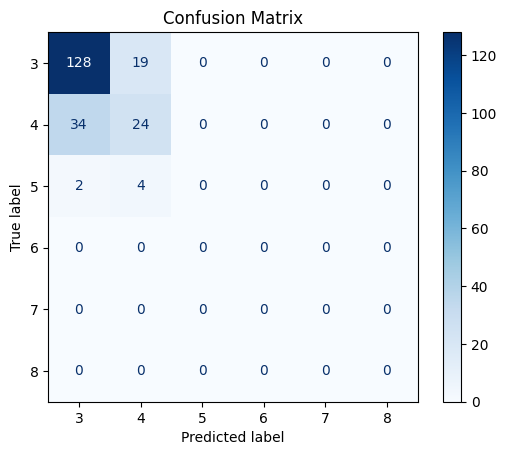

In [471]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Calculate accuracy
accuracy = accuracy_score(y_test_labels, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred, labels=range(3, 9))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(3, 9))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

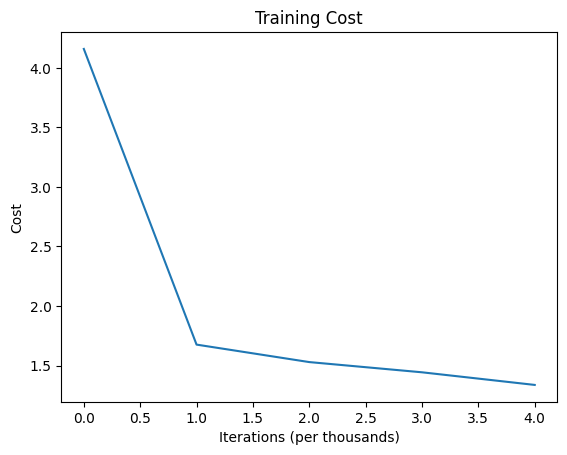

In [472]:
# Plot the cost over iterations
plt.plot(costs)
plt.xlabel("Iterations (per thousands)")
plt.ylabel("Cost")
plt.title("Training Cost")
plt.show()

## Thank you so much for coming to the end of this notebook.😊